In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import os
import seaborn as sns

# 신경망 -> 비트 코인 가격 예측 모델
# RNN -> 주식 예측 모델

In [10]:
df = yfinance.download('BTC-USD', '2017-01-01', '2020-07-27')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-31,960.627014,963.742981,947.236023,963.742981,963.742981,99135104
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
...,...,...,...,...,...,...
2020-07-22,9375.080078,9530.518555,9319.653320,9525.363281,9525.363281,16532254884
2020-07-23,9527.141602,9610.247070,9483.003906,9581.072266,9581.072266,18146399002
2020-07-24,9585.514648,9623.336914,9481.454102,9536.892578,9536.892578,16552768325


In [15]:
df=pd.read_csv("bitcoin.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.66,1003.08,958.70,998.33,998.33,147775008
1,2017-01-02,998.62,1031.39,996.70,1021.75,1021.75,222184992
2,2017-01-03,1021.60,1044.08,1021.60,1043.84,1043.84,185168000
3,2017-01-04,1044.40,1159.42,1044.40,1154.73,1154.73,344945984
4,2017-01-05,1156.73,1191.10,910.42,1013.38,1013.38,510199008


In [16]:
dfClose = pd.DataFrame(df['Close'])

In [17]:
df['Date']

0       2017-01-01
1       2017-01-02
2       2017-01-03
3       2017-01-04
4       2017-01-05
           ...    
1044    2019-11-11
1045    2019-11-12
1046    2019-11-13
1047    2019-11-14
1048    2019-11-15
Name: Date, Length: 1049, dtype: object

In [20]:
dfClose.index = pd.to_datetime(df['Date'])

In [21]:
dfClose

,Close
Date,
2017-01-01,998.33
2017-01-02,1021.75
2017-01-03,1043.84
2017-01-04,1154.73
2017-01-05,1013.38
...,...
2019-11-11,8757.79
2019-11-12,8815.66
2019-11-13,8808.26


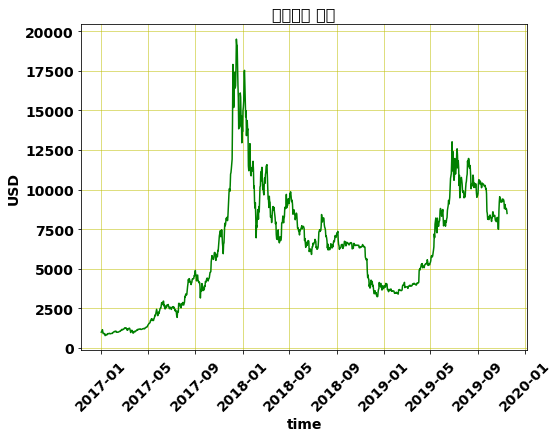

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(dfClose, color = 'g')
plt.title('비트코인 종가', weight = 'bold', fontsize = 16)
plt.xlabel('time', weight = 'bold', fontsize = 14)
plt.ylabel('USD', weight = 'bold', fontsize = 14)
plt.xticks(weight = 'bold',fontsize = 14, rotation = 45)
plt.yticks(weight = 'bold',fontsize = 14)
plt.grid(color = 'y', linewidth = 0.5)

과거 15일 동안의 비트코인 가격입력 -> 오늘의 가격 예측

In [24]:
listOfAttributes = ['Close']
listOfPrevTinstants = []
for i in range(1, 16):
    listOfPrevTinstants.append(i)
listOfPrevTinstants

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [25]:
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.66,1003.08,958.70,998.33,998.33,147775008
1,2017-01-02,998.62,1031.39,996.70,1021.75,1021.75,222184992
2,2017-01-03,1021.60,1044.08,1021.60,1043.84,1043.84,185168000
3,2017-01-04,1044.40,1159.42,1044.40,1154.73,1154.73,344945984
4,2017-01-05,1156.73,1191.10,910.42,1013.38,1013.38,510199008
5,2017-01-06,1014.24,1046.81,883.94,902.20,902.20,351876000
6,2017-01-07,903.49,908.59,823.56,908.59,908.59,279550016
7,2017-01-08,908.17,942.72,887.25,911.20,911.20,158715008
8,2017-01-09,913.24,913.69,879.81,902.83,902.83,141876992
9,2017-01-10,902.44,914.87,901.06,907.68,907.68,115808000


close t-1 t-2  ... y-15


In [43]:
def creatRegressorAttributes(df,attribute, listOfPrevTinstants):
    listOfPrevTinstants.sort()
    start = listOfPrevTinstants[-1] #가장 마지막 것을 출력
    end =len(df)
    df['datetime'] = df.index
    df.reset_index(drop = True)
    dfCopy = df[start : end]
    dfCopy.reset_index(drop= True, inplace = True)
    # print(df.head())
    # print(dfCopy.head())
    for attr in attribute:
        foobar = pd.DataFrame()
        for prevT in listOfPrevTinstants:
            newcol = pd.DataFrame(df[attr].iloc[(start - prevT) : (end  - prevT)])
            newcol.reset_index(drop = True, inplace = True)
            newcol.rename(columns = {attr:'{}_(t-{})'.format(attr, prevT)}, inplace = True)
            foobar = pd.concat([foobar, newcol], sort = False, axis =1)
        pd.concat([dfCopy, foobar], sort = False, axis = 1)
    dfCopy.set_index(['datetime'], drop = True, inplace = True)
    return dfCopy

In [59]:
dfNew = creatRegressorAttributes(dfClose, listOfAttributes, listOfPrevTinstants)

In [45]:
from keras.layers import *
from keras.models import *
from keras.optimizers import SGD

In [50]:
inputlayer = Input(shape = (15), dtype= 'float32')
Dense1 = Dense(60, activation ='linear')(inputlayer) # 소괄호 에는 입력을 주는 거
Dense2 = Dense(60, activation ='linear')(Dense1)
dropLayer = Dropout(0.2)(Dense2)
outputLayer = Dense(1, activation = 'linear')(dropLayer)



In [52]:
model = Model(inputs = inputlayer, outputs = outputLayer)
model.compile(loss = 'mean_squared_error', optimizer='adam')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 15)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 60)                960       
_________________________________________________________________
dense_3 (Dense)              (None, 60)                3660      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 61        
Total params: 4,681
Trainable params: 4,681
Non-trainable params: 0
_________________________________________________________________


In [58]:
dfNew=creatRegressorAttributes(dfClose,listOfAttribute, listOfPrevTlnstants)

NameError: name 'listOfAttribute' is not defined

In [60]:
#training, validation, testdata 로 분리
testSetSize=0.05
validSetSize=0.05
dfCopy=dfNew.reset_index(drop=True)
dfCopy #1034 rows × 16 columns

,Close,datatime
0,831.53,2017-01-16
1,907.94,2017-01-17
2,886.62,2017-01-18
3,899.07,2017-01-19
4,895.03,2017-01-20
...,...,...
1029,8757.79,2019-11-11
1030,8815.66,2019-11-12
1031,8808.26,2019-11-13
1032,8708.09,2019-11-14


In [62]:
dfCopy #0~1033
# int(np.floor(len(dfCopy)*(1-testSetSize))) #982.3 -> floor:982.0 -> int 982
dfTest=dfCopy.iloc[int(np.floor(len(dfCopy)*(1-testSetSize))) :]
dfTrainValid=dfCopy.iloc[ : int(np.floor(len(dfCopy)*(1-testSetSize)))]

In [66]:
dfValid=dfTrainValid.iloc[int(np.floor(len(dfTrainValid)*(1-validSetSize))):]
dfTrain=dfTrainValid.iloc[:int(np.floor(len(dfTrainValid)*(1-validSetSize)))]
print(dfValid.shape)
print(dfTrain.shape)
print(dfTest.shape)

(50, 2)
(932, 2)
(52, 2)


In [68]:
xTrain, yTrain = dfTrain.iloc[:,1:], dfTrain.iloc[:, 0]
xTest, yTest = dfTest.iloc[:,:1], dfTest.iloc[:, 0]
xValid, yValid = dfValid.iloc[:,1:], dfValid.iloc[:, 0]


In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
scaler = MinMaxScaler(feature_range=(0.01, 0.09))

In [73]:
xTrainScaled = scaler.fit_transform(np.array(xTrain))
xValidScaled = scaler.fit_transform(np.array(xValid))
xTestScaled = scaler.fit_transform(np.array(xTest))


In [75]:
yTrainScaled  = scaler.fit_transform(np.array(yTrain).reshape(-1, 1))
yVaildScaled  = scaler.fit_transform(np.array(yValid).reshape(-1, 1))
yTestScaled  = scaler.fit_transform(np.array(yTest).reshape(-1, 1))
# yTrainScaled  = scaler.fit_transform(np.array(yTrain), reshape(-1, 1))


In [76]:
modl.fit(x = xTrainScaled, y = yTrainScaled, batch_size =5. )

NameError: name 'modl' is not defined

In [77]:
yPred = model.predict(xTrainScaled)
yPredReScaled = scaler.inverse_transform(yPred)

ValueError: in user code:

    C:\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    C:\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1122 predict_step  **
        return self(x, training=False)
    C:\python37\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    C:\python37\lib\site-packages\tensorflow\python\keras\engine\network.py:719 call
        convert_kwargs_to_constants=base_layer_utils.call_context().saving)
    C:\python37\lib\site-packages\tensorflow\python\keras\engine\network.py:888 _run_internal_graph
        output_tensors = layer(computed_tensors, **kwargs)
    C:\python37\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:886 __call__
        self.name)
    C:\python37\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer dense_2 is incompatible with the layer: expected axis -1 of input shape to have value 15 but received input with shape [None, 1]


In [ ]:
yTrainScaled = 

In [78]:
from sklearn.metrics import r2_score

In [80]:
yTestReScaled = scaler.inverse_transform(yTestReScaled)
score = r2_score(yTestReScaled, yPredReScaled)
print(score)


NameError: name 'yTestReScaled' is not defined

In [82]:
xy = np.loadtxt('stock_daily.csv', delimiter=",")

In [84]:
xy = xy[::-1]

In [85]:
scaler = MinMaxScaler(feature_range=(0,1))
xy = scaler.fit_transform(xy)
xy

array([[2.13751054e-01, 2.08179810e-01, 1.91791832e-01, 4.66075110e-04,
        1.92092403e-01],
       [1.93935034e-01, 2.03641926e-01, 2.08664571e-01, 2.98467330e-03,
        1.96551555e-01],
       [2.10516454e-01, 2.05289413e-01, 2.03558748e-01, 2.59926504e-04,
        1.87749731e-01],
       ...,
       [9.47895671e-01, 9.49273354e-01, 9.72504894e-01, 1.14170476e-01,
        9.66454635e-01],
       [9.56900354e-01, 9.59881107e-01, 9.80354498e-01, 1.42502465e-01,
        9.77850239e-01],
       [9.73335806e-01, 9.75431522e-01, 1.00000000e+00, 1.11123062e-01,
        9.88313021e-01]])

In [86]:
x = xy
y = xy[:,[-1]] # 종가

In [87]:
xData = []
yData = []
seqLangth = 7 

In [89]:
for i in range(0, len(y) - seqLangth):
    xx = x[i:i+seqLangth]
    yy = y[i+seqLangth]
    print(xx ,'->', yy)
    xData.append(xx)
    yData.append(yy)


[[2.13751054e-01 2.08179810e-01 1.91791832e-01 4.66075110e-04
  1.92092403e-01]
 [1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142111e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967474e-01]
 [2.33129931e-01 2.36419163e-01 1.62682724e-01 5.70171193e-01
  1.47442742e-01]] -> [0.13289962]
[[1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142111e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967474e-01]
 [2.33129931e-01 2.3641

In [91]:
np.shape(xData)
np.shape(yData)

(1450, 1)